In [3]:
from data_loading import pack

File loading... complete!! 227.2608368396759 sec
File unpacking... complete 2.0845799446105957 sec


In [275]:
pack.MP.mkt_open

DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-04',
               '2019-10-07', '2019-10-08'],
              dtype='datetime64[ns]', name='Date', length=4921, freq=None)

In [311]:
pack.MP.kospi.value

Date
1999-11-01     876.55
1999-11-02     890.18
1999-11-03     887.15
1999-11-04     911.82
1999-11-05     913.09
               ...   
2019-10-04    2020.69
2019-10-05        NaN
2019-10-06        NaN
2019-10-07    2021.73
2019-10-08    2046.25
Name: 종가지수(포인트), Length: 7282, dtype: float64

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [6]:
%matplotlib inline

<br>
<br>

## __I. Construct Portfolio__
---
- Daily Trading 
    - Exit at the date of purchasing
        - Condition
    - Not deterministic
        - Condition, buy_date, sell_date, period
- Weekly Trading
    - 
- Monthly Trading

<br>
<br>

### __Portolio Type I - Fixed Rebalance__

---

- DataFrame Type

In [201]:
# Daily Trading Type1 - Buy & Sell on the day
test_from = '2019-01-01'
test_to = '2019-09-30'

# Condition Table is given

In [276]:
# We need Filtered Data(Except Holiday&Weekend)

# 하루 최대 변동폭(양수) / (종가 - 시가)
# 양수 = 상승마감 
# 음수 = 하락마감 
# 1<value<2 ; 안정적 상승

stg_01 = (pack.PRP.price_high.value - pack.PRP.price_low.value)/(pack.PRP.price.value-pack.PRP.price_open.value)
stg_01 = stg_01.loc[pack.MP.mkt_open]
stg_01 = stg_01.loc[test_from:test_to]

cond_t = pd.DataFrame(np.where((stg_01>1)&(stg_01<1.1), True, False), columns = stg_01.columns, index=stg_01.index)
stg_01 = stg_01[cond_t]

stg_01.dropna(axis=1, how='all', inplace=True)
stg_01.dropna(axis=0, how='all', inplace=True)

stg_01_w = stg_01.apply(lambda row: row/row.sum(), axis=1) # 포트폴리오 내 종목 비중
stg_01_w = stg_01_w.shift(1).dropna(axis=0, how='all') # 다음 날 구매

In [303]:
stg_02 = (pack.PRP.price_high.value - pack.PRP.price_low.value)/(pack.PRP.price.value-pack.PRP.price_open.value)
stg_02 = stg_02.loc[pack.MP.mkt_open]
stg_02 = stg_02.loc[test_from:test_to]

cond_t = pd.DataFrame(np.where((stg_02>1.1)&(stg_02<1000), True, False), columns=stg_02.columns, index=stg_02.index)
stg_02 = np.log(stg_02[cond_t])

stg_02.dropna(axis=1, how='all', inplace=True)
stg_02.dropna(axis=0, how='all', inplace=True)

stg_02_w = stg_02.apply(lambda row: row/row.sum(), axis=1) # 포트폴리오 내 종목 비중
stg_02_w = stg_02_w.shift(1).dropna(axis=0, how='all') # 다음 날 구매

In [304]:
test_return = (pack.PRP.price.value/pack.PRP.price_open.value-1)
test_return = reduction(test_return, stg_02_w)

<br>
<br>

#### __매 리밸런스기 포트폴리오 비중이 주어졌을 때 실제 종목별 투자금액 및 주 수__
---
* 포트폴리오 내 종목 비율은 Fixed
* 포트폴리오 내 실제 종목 투자 금액은 이전 리밸런스기 평가금액에 따라 달라짐
* 포트폴리오 내 종목 수도 동일
---

In [305]:
# Eliminate Unnecessary Parts of Large_df based on Small_df
def reduction(large_df, small_df):
    return large_df.loc[small_df.index,small_df.columns]

# Return empty DataFrame 
def plate(df):
    return pd.DataFrame(columns=df.columns, index=df.index)

# Return empty Series
def stick(df, stick_name=None):
    return pd.Series(index=df.index, name=stick_name)


# Property
## Asset1 = Asset & Remain Cash
## Asset2 = Asset & Remain Cash
class Asset:
    def __init__(self, name):
        # 1) 자산 이름
        self.asset_name = name
        
    def activate(self, init_invest, dates, items):
        # 1) init_invest : 초기 투자금액
        # 2) period : 투자 기간내 유의한 날짜(자산 배분 변화일)
        # 3) items : 투자 자산군 내 개별 종목들
        self.init_invest = init_invest # 초기 투자값
        self.portfolio = pd.DataFrame(data=np.zeros((dates.size, items.size)), # 리밸런스시 보유할 종목 수
                                      index=dates, columns=items)
        self.trade = pd.DataFrame(data=np.zeros((dates.size, items.size)), # 주문 수
                                  index=dates, columns=items)
        self.wallet = pd.DataFrame(data=np.zeros((dates.size, 3)), # 자산 가치 평가
                                  index=dates, columns=[self.asset_name, 'cash', 'total'])
        self.wallet.iloc[0].cash = init_invest
        self.wallet.iloc[0].total = init_invest

In [306]:
list(stg_01_w.index).index(stg_01_w.index[0])

0

In [312]:
(stg_01_w).to_

Code,A000020,A000050,A000060,A000070,A000080,A000100,A000140,A000150,A000180,A000210,...,A312610,A316140,A900100,A900140,A900250,A900290,A900310,A950110,A950140,A950170
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN,0.1625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
def backtest(port_weight, deposit, trading_type='D-0O0C', asset_name='stock', fee_rate=0.00015, tax_rate=0.003):
    # 1) Port_weight : 전략에 따라 매 리밸런스기 보유해야할 종목 비중
    # 2) deposit : 최초 투자금액
    # 3) trading_type : Daily/Weekly/Monthly/Conditionally - Buy at Open/Close after n date, Sell at Open/Close after n date
    # 4) asset_name : 자산명
    # 5) fee_rate : 기관 중개 수수료
    # 6) tax_rate : 세금
    
    trading_type = trading_type.split('-')
    
    # 투자전략(매 리밸런스기 자산 분배 비율)
    asset = Asset(asset_name)
    asset.activate(deposit, port_weight.index, port_weight.columns)
    
    # trading_type에 따라 매수가격 및 매도가격 데이터프레임 설정
    price_buy = reduction(pack.PRP.price_open.value, port_weight)
    price_sell = reduction(pack.PRP.price_open.value, port_weight)
    
    def _backtesting(row):
        t = row.name
        if t!= port_weight.index[0]:
            # 리밸런스 시점 필요 주문 파악 - 매도 후 - 매수 가능
            ## 1) Wallet Total 파악
            ## 2) 필요한 주문 규모 파악
            ## 2) 매도 금액            
            asset.wallet.loc[t].total = asset.wallet.loc[t].cash + (asset.portfolio.loc[t]*price_sell.loc[t]).sum() # 현금 + 갖고있는 자산의 청산가치
            print(asset.wallet.loc[t].totalv)
            asset_alloc = row*asset.wallet.loc[t].total # 자산당 배정 금액
            asset.trade.loc[t] = (asset_alloc//price_buy.loc[t])-asset.portfolio.iloc[list(port_weight.index).index(row.name)-1] # 배정 금액을 바탕으로 종목별 실제 주문하는 규모
            # asset.portfolio.loc[t] = 
            # asset.trade.loc[t] -= asset.portfolio.loc[t]
            # asset.wallet.loc[t].cash += asset.trade.loc
            
        else:
            # 최초 주문시 매도 없음
            ## 1) 종목별 할당 금액 계산
            ## 2) 종목별 실제 구매 가능 수 계산 - 이후 리밸런스 신호가 오지 않는한 이 포트폴리오 유지한다고 가정
            ## 3) 리밸런스 주문
            ## 4) 리밸런스 후 자산변화(ash, asset_name, total)
            asset_alloc = row * asset.wallet.loc[t].total 
            asset.portfolio.loc[t] = asset_alloc//(price_buy.loc[t])
            asset.trade.loc[t] = asset.portfolio.loc[t]
            
        trade_buy = (asset.trade.loc[t])[asset.trade.loc[t]>0]
        trade_sell = (asset.trade.loc[t])[asset.trade.loc[t]<0]
        
        # print((trade_buy*price_buy.loc[t]).sum())
        # print('*****\n\n\n BUY\n', trade_buy, '\nSELL\n',trade_sell)
        fee_buy = (trade_buy*price_buy.loc[t]).sum()*fee_rate
        fee_sell = (trade_sell*price_sell.loc[t]).sum()*fee_rate
        tax = (trade_sell*price_sell.loc[t]).sum()*tax_rate
        cost = fee_buy + fee_sell + tax
        # print('\nCOST :',cost/10000000000000000,'\n\n')
        
        asset.wallet.loc[t:].cash = asset.wallet.loc[t].total-(trade_buy*price_buy.loc[t]).sum()+(trade_sell*price_sell.loc[t]).sum()-cost   
        
    port_weight.T.apply(lambda row: _backtesting(row))
    
    return asset


In [308]:
result1 = backtest(stg_01_w, 10000000000000000)
# result2 = backtest(stg_02_w, 10000000000000000)

/Users/igwanghyeon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [309]:
result1.wallet

,stock,cash,total
Date,,,
2019-01-03,0.0,-1.500000e+12,1.000000e+16
2019-01-04,0.0,-1.708838e+15,-1.500000e+12
2019-01-07,0.0,-3.412293e+15,-1.708838e+15
2019-01-08,0.0,-6.813837e+15,-3.412293e+15
2019-01-09,0.0,-1.360621e+16,-6.813837e+15
...,...,...,...
2019-09-24,0.0,-6.210883e+67,-3.110340e+67
2019-09-25,0.0,-1.240220e+68,-6.210883e+67
2019-09-26,0.0,-2.476534e+68,-1.240220e+68


In [ ]:

'''

            
            asset.wallet.loc[t].cash -= (asset.trade.loc[t]*price_buy.loc[t]).sum()
            
            
        t = row.name
        
        asset_alloc = row*asset.value.loc[t].cash # 종목별 할당 금액
        asset.portfolio.loc[t:] = asset_alloc//price_buy.loc[t]
        
    
    if trading_type in ['BOSC']:
        
    
    # Construct Asset from the Strategy(port_weight)
    asset = Asset(asset_name)
    asset.activate(deposit, port_weight.index, port_weight.columns)
    
    def _backtesting(row): # 적어도 하루 이상 자산 유지
        # 
        t = row.name
        asset_alloc = asset.value.loc[t].cash * row # 종목별 할당 금액(최대 투자 가능 금액)
        asset_alloc_n = asset_alloc//price_buy.loc[t] # 종목별 실제 운용 주
        
        asset.portfolio.loc[t]
        asset.
        buy_value = ((asset_alloc//price_buy.loc[t])*price_buy.loc[t]).sum()
        sell_value = ((asset_alloc//price_buy.loc[t])*price_sell.loc[t]).sum()
           
        
        
    def _backtesting_daily(row):
        t = row.name
        # Use only Cash Item on Transaction Book
        # Before Market Open
        ## 1) Budget Allocation per Item 
        asset_alloc = asset.value.loc[t].cash * row # 종목별 할당 금액(최대 투자 가능 금액)
        
        # With Market Open
        ## 1) Purchasable Price
        ## 2) Purchase Amount
        ## 3) The number of purchasing per Item
        ## 4) Remaining Cash
        # asset.trade.loc[t] = (asset_alloc//price_buy.loc[t]) # 매수 기록
        # asset.trade.loc[t] -= (asset_alloc//price_buy.loc[t]) # 매도 기록
        buy_value = ((asset_alloc//price_buy.loc[t])*price_buy.loc[t]).sum()
        sell_value = ((asset_alloc//price_buy.loc[t])*price_sell.loc[t]).sum()
        
        fee_buy = buy_value*fee_rate
        fee_sell = sell_value*fee_rate
        tax = sell_value*tax_rate
        
        asset.value.loc[t:].cash = asset.value.loc[t].cash+(sell_value-buy_value)-fee_buy-fee_sell-tax

    
    
    
    return
    # Prepare price data based on trading_type
    price_o = reduction(pack.PRP.price_open.value, port_weight)
    price_c = reduction(pack.PRP.price.value, port_weight)

    # 해당일 마감시점 장부
    transaction_book = pd.DataFrame(index=port_weight.index.insert(port_weight.index.size, 
                                                                   port_weight.index[-1]+datetime.timedelta(days=1)), 
                                    columns=['cash','asset','total','buy','sell'])
    transaction_book.cash.iloc[0].cash = deposit;     
    
    pocket.iloc[0].Cash = deposit; pocket.iloc[0].Stock = 0
    pocket.iloc[0].Total = pocket.iloc[0].sum()
    pocket.iloc[1].Total = pocket.iloc[0].Total
    
    budget_alloc = plate(port_weight)
    purchase_amt = plate(port_weight)
    purchase_share = plate(port_weight)

        
        # return (buy_amt, sell_amt)
    
    port_weight.T.apply(lambda row: _daily_backtesting(row))
    transaction_book.loc[transaction_book.index[0]-datetime.timedelta(days=1)] = [deposit, 0, deposit, 0, 0]
    transaction_book.sort_index(inplace=True)
    return transaction_book
    
  
    for t, pt in port_weight.iterrows():
        # Before Market Open
        # 1) Budget Allocation per Item 
        pocket.loc[t].Total = deposit
        budget_alloc.loc[t] = pt*pocket.loc[t].Total
        # With Market Open
        # 1) Purchasable Price
        # 2) Purchase Amount
        # 3) The Number of Shares
        # 4) Remaining Cash
        purchase_price = price_o.loc[t]
        purchase_amt.loc[t] = budget_alloc.loc[t]//purchase_price
        purchase_share.loc[t] = purchase_amt.loc[t]/purchase_price
        pocket.loc[t].Cash = pocket.loc[t].Total - purchase_amt.loc[t].sum()

        # Before Market Close
        # 1) Selable Price
        # 2) Evaluation Amount
        sale_price = price_c.loc[t]
        pocket.loc[t].Stock = (sale_price*purchase_share.loc[t]).sum()
        pocket.loc[t].Total = pocket.loc[t].Cash + pocket.loc[t].Stock
        deposit = pocket.loc[t].Total

    return pocket
'''

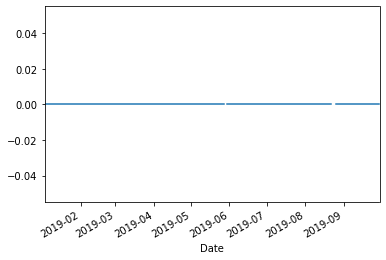

In [210]:
(result2.value.cash - result1.value.cash).plot()

In [134]:
result.value.stock

Date
2019-01-03    NaN
2019-01-04    NaN
2019-01-07    NaN
2019-01-08     10
2019-01-09     10
             ... 
2019-09-24     10
2019-09-25     10
2019-09-26     10
2019-09-27     10
2019-09-30     10
Name: stock, Length: 181, dtype: object

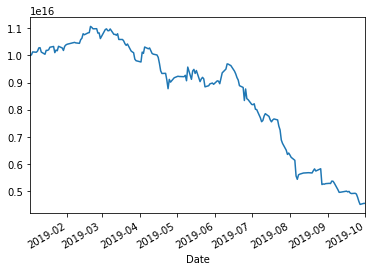

In [109]:
result.cash.plot()

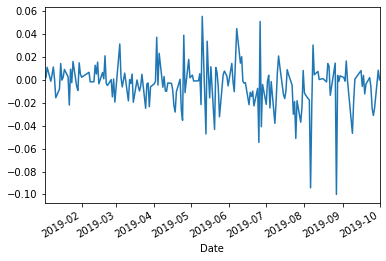

In [108]:
(result.cash.pct_change()).plot()

In [29]:
result

,Cash,Stock,Total
Date,,,
2019-01-02,100000000,0,100000000
2019-01-03,9.99923e+07,7774.91,1e+08
2019-01-04,9.99819e+07,18142.3,1e+08
2019-01-07,9.99889e+07,11264.4,1e+08
2019-01-08,9.99882e+07,12081.6,1e+08
...,...,...,...
2019-09-24,9.99539e+07,20301.5,9.99742e+07
2019-09-25,9.99617e+07,12141.6,9.99738e+07
2019-09-26,9.99479e+07,24763.3,9.99726e+07


In [ ]:

for t, pt in port_w.iterrows():
    allt = pt*budget # 종목당 할당금액
    price_open
    # 종목당 실제 매수가능 금액 - 할당금액 내에서 최대 매수 가능 금액
    print((pt*budget).sum())
    
    break
    


In [ ]:
# 포트폴리오 내 실제 종목 금액
# 포트폴리오 평가 금액과 함께 계산되어야 함
class pocket:
    def __init__(self, init_deposit, ):
        self.cash = init_deposit
        self.asset = 0
        self.value = 
    

In [ ]:
    
# 데이터팩 파싱 
class DataGuideData(PackInfo_DataGuide):
    # PackInfo = PackInfo_DataGuide() # 클래스 선언과 함께 생성
    market_open = None
    
    def __init__(self):
        # Pack Data - PRP, MP, SDP, QP
        # self.PackInfo = PackInfo_DataGuide() # Pack 구성 정보를 담을 Pack Information Set
        self.Pack = PackInfo_DataGuide() # Pack 구성 정보를 바탕으로 개별 데이터가 저장될 Data Set
        
        self.PRD = None # Parsing 대상이 되는 전체 Raw Data - Price Related
        self.MD = None # Parsing 대상이 되는 전체 Raw Data - Market
        self.SDD = None # Parsing 대상이 되는 전체 Raw Data - Supply & Demand 
        self.QD = None # Parsing 대상이 되는 전체 Raw Data - Quality
        self.monthly_return = None
        self.monthly_return_ie = None
        self._read() # Read data 
        self._unpack() # Unpack files
        # self._monthlyreturn()
        
        # self._monthlyreturn() # Calculate Monthly Return
        
    def _read(self):
        print('File loading... ', end='')
        start = time.time()
        self.PRD = dropComma(pd.read_pickle(self.Pack.PRP.directory.value))
        self.MD = dropComma(pd.read_pickle(self.Pack.MP.directory.value))
        self.SDD = dropComma(pd.read_pickle(self.Pack.SDP.directory.value))
        # self.QD = pd.read_pickle(self.PackInfo.QP.directory.value)
        print('complete!!', time.time()-start, 'sec')
              
    def _unpack(self):
        print('File unpacking... ', end='')
        start = time.time()
        
        # PRICE RELATED DATA UNPACK
        for i, component in enumerate(self.Pack.PRP):
            if component.name == 'directory': continue
            component._value_ = self.PRD.xs(tuple(self.Pack.PRP)[i].value, level=1, axis=1)

        # SUPPLY&DEMAND UNPACK
        for i, component in enumerate(self.Pack.SDP):
            if component.name == 'directory': continue
            component._value_ = self.SDD.xs(tuple(self.Pack.SDP)[i].value, level=1, axis=1)
        
        # MARKET DATA UNPACK
        for i, component in enumerate(self.Pack.MP):
            if component.name == 'directory': continue
            mkt = '코스피' if component.name[:5] == 'kospi' else '코스닥'
            component._value_ = (self.MD[mkt])[tuple(self.Pack.MP)[i].value]
        self.market_open = (self.Pack.MP.kospi.value.dropna()).index
        
        print('complete', time.time()-start, 'sec')
        
    def _monthlyreturn(self):
        monthlyPrice_init = self.Pack.PRP.price.value.resample('M').first()
        monthlyPrice_end = self.Pack.PRP.price.value.resample('M').last()
        
        self.monthly_return = (((monthlyPrice_init).astype('float')/(monthlyPrice_init.shift(1)).astype('float').shift(-1))-1)
        # self.monthly_return_ie = (monthlyPrice_end/monthlyPrice_init)-1 # 월초 매수 월말 매도
        
    # Data integrity check    
    def _updateData(self):
        pass
    

_DT = DataGuideData()
pack = _DT.Pack

In [20]:
(strategy_sample01).sum(axis=1)

Date
2019-01-01     0.000000
2019-01-02     6.341821
2019-01-03     8.402334
2019-01-04    23.267074
2019-01-05     0.000000
                ...    
2019-10-21    11.741753
2019-10-22    11.727399
2019-10-23     7.385305
2019-10-24     9.544657
2019-10-25     8.532857
Length: 298, dtype: float64

In [95]:
def _plate(strategy):
    plate = pd.DataFrame(columns=strategy.columns, index=strategy.index) # 판 만들기
    plate = (plate.apply(lambda col: col.replace(np.nan, col.name)))
    return plate

In [96]:
plate = _plate(strategy_sample01)

<br>

In [100]:
# Option1인 경우 포트폴리오 구성 
# - 휴일인 경우 포트폴리오내에 종목 없음
portfolio = {}
for i, row in strategy_sample01.iterrows():
    row.name = row.dropna()

TypeError: Series.name must be a hashable type

In [99]:
portfolio

{Timestamp('2010-01-01 00:00:00'): Series([], Name: 2010-01-01 00:00:00, dtype: object),
 Timestamp('2010-01-02 00:00:00'): Series([], Name: 2010-01-02 00:00:00, dtype: object),
 Timestamp('2010-01-03 00:00:00'): Series([], Name: 2010-01-03 00:00:00, dtype: object),
 Timestamp('2010-01-04 00:00:00'): Code
 A000060    A000060
 A000400    A000400
 A000480    A000480
 A000660    A000660
 A000810    A000810
 A004020    A004020
 A004560    A004560
 A005830    A005830
 A005940    A005940
 A006800    A006800
 A007660    A007660
 A009450    A009450
 A016360    A016360
 A016610    A016610
 A017900    A017900
 A030520    A030520
 A034220    A034220
 A035080    A035080
 A036030    A036030
 A036810    A036810
 A042700    A042700
 A049070    A049070
 A051360    A051360
 A051370    A051370
 A054210    A054210
 A067160    A067160
 A068790    A068790
 A071050    A071050
 A078020    A078020
 A083310    A083310
 A089890    A089890
 A092220    A092220
 A104700    A104700
 Name: 2010-01-04 00:00:00, dtype

In [97]:
(strategy_sample01.index != plate.index).sum()
(strategy_sample01.columns != plate.columns).sum()

0

In [85]:
plate[strategy_sample01].iloc[0].name

Timestamp('2010-01-01 00:00:00')

In [49]:
# TEST
(strategy_sample01.sum(axis=1))

Date
2010-01-01     0
2010-01-02     0
2010-01-03     0
2010-01-04    33
2010-01-05     4
              ..
2019-10-21    11
2019-10-22    11
2019-10-23     7
2019-10-24     9
2019-10-25     8
Length: 3585, dtype: int64

In [54]:
# Daily Trading Algorithm
# Option1 - Buy at open Sell at end
# Option2 - Buy at open Sell at next open
# Option3 - Buy at end Sell at next end

In [ ]:
# Option1
portfolio_table = 

In [49]:
# TEST for Daily
np.where((strategy_sample01.sum(axis=1))!=0, False, True)

Date
2010-01-01     0
2010-01-02     0
2010-01-03     0
2010-01-04    33
2010-01-05     4
              ..
2019-10-21    11
2019-10-22    11
2019-10-23     7
2019-10-24     9
2019-10-25     8
Length: 3585, dtype: int64

In [53]:
# 평균 유지 기간 - 선정된 종목의
# 회전율
# Rough / Exact / Advanced
strategy_sample01

Code,A000020,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,A000180,...,A900100,A900140,A900250,A900290,A900310,A950110,A950140,A950160,A950170,A950180
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-04,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-10-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-10-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<br>
<br>

### __Portolio Type II__

---